<a href="https://colab.research.google.com/github/ahmedebeed555/NaiiveBays/blob/main/NaiiveBays_AhmedEbeid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multinomial Naiive Bays

Accuracy: 0.939622641509434

Classification Report:
                     precision    recall  f1-score   support

         rec.autos       0.91      0.99      0.95       297
talk.politics.misc       0.98      0.88      0.93       233

          accuracy                           0.94       530
         macro avg       0.95      0.93      0.94       530
      weighted avg       0.94      0.94      0.94       530



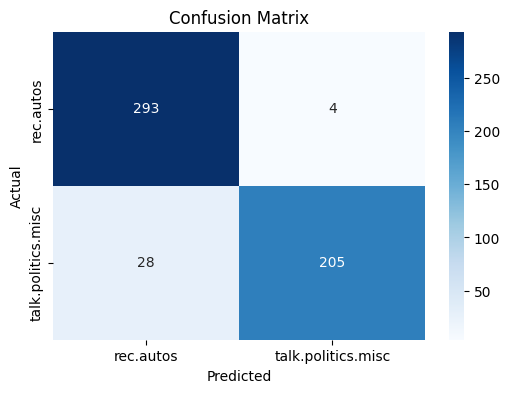

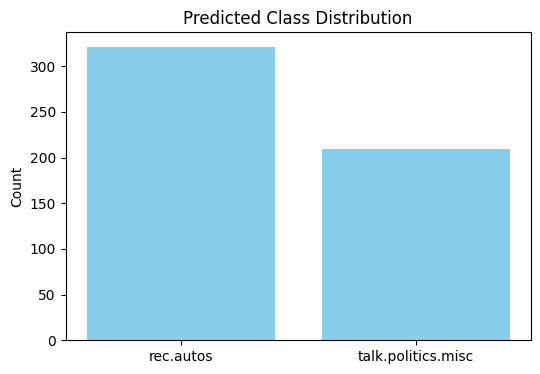

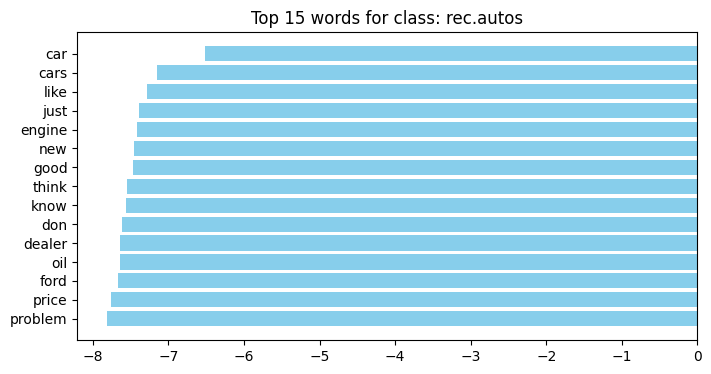

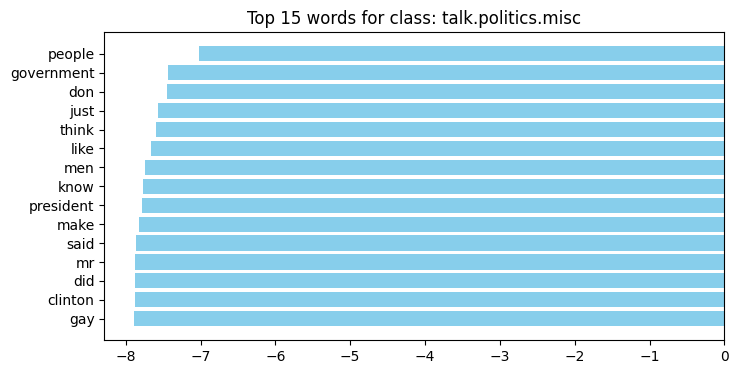

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load dataset
categories = ['rec.autos', 'talk.politics.misc']  # two categories to simulate binary sentiment
data = fetch_20newsgroups(
    subset='all',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target,
    test_size=0.3,
    stratify=data.target,
    random_state=42
)

# 3. Convert text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Train Naïve Bayes
model = MultinomialNB(alpha=1.0)
model.fit(X_train_tfidf, y_train)

# 5. Predictions
predictions = model.predict(X_test_tfidf)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=categories))


# ---------------- VISUALIZATIONS ---------------- #

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. Predicted Class Distribution
unique, counts = np.unique(predictions, return_counts=True)
plt.figure(figsize=(6, 4))
plt.bar([categories[i] for i in unique], counts, color="skyblue")
plt.title("Predicted Class Distribution")
plt.ylabel("Count")
plt.show()

# 3. Top Words per Class
def plot_top_words(classifier, vectorizer, categories, n=15):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        # Use feature_log_prob_ for MultinomialNB
        topn = np.argsort(classifier.feature_log_prob_[i])[-n:]
        plt.figure(figsize=(8, 4))
        plt.barh(feature_names[topn], classifier.feature_log_prob_[i][topn], color="skyblue")
        plt.title(f"Top {n} words for class: {category}")
        plt.show()

plot_top_words(model, vectorizer, categories)

Gaussian Naiive Bays

Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



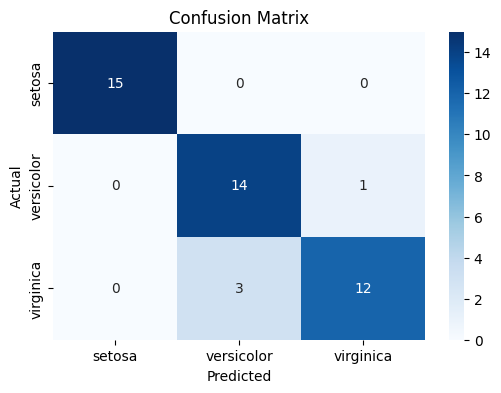

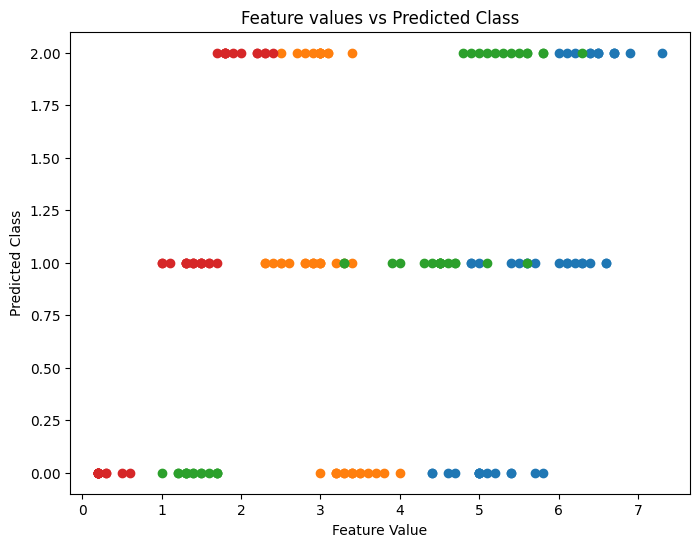

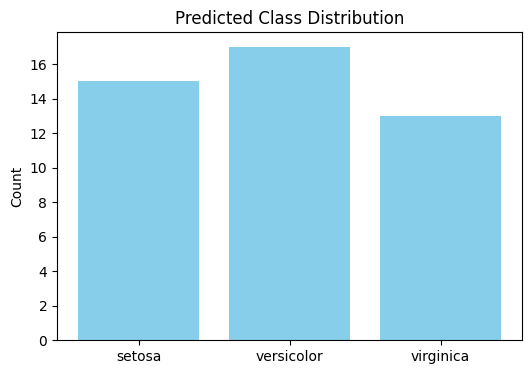

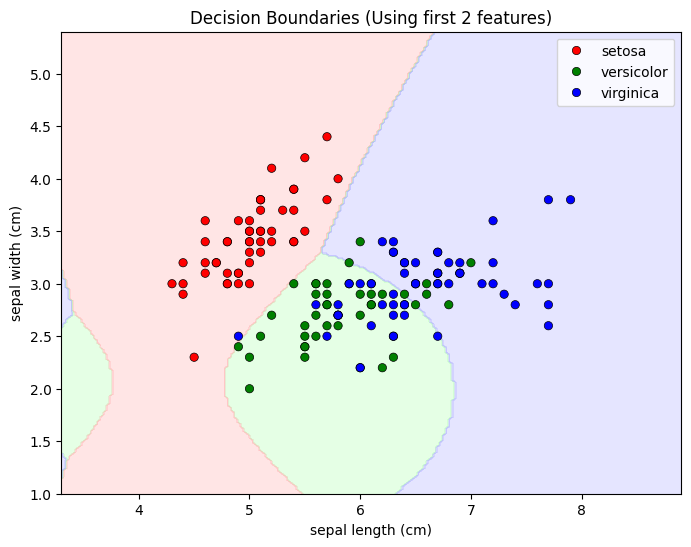

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load dataset (Iris: flower classification)
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Train Gaussian Naïve Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


# ---------------- VISUALIZATIONS ---------------- #

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. Feature Distributions (pairplot style but only test predictions)
plt.figure(figsize=(8, 6))
for i in range(4):  # 4 features
    plt.scatter(X_test[:, i], y_pred, label=iris.feature_names[i])
plt.title("Feature values vs Predicted Class")
plt.xlabel("Feature Value")
plt.ylabel("Predicted Class")
plt.show()

# 3. Class Distribution of Predictions
unique, counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(6, 4))
plt.bar([iris.target_names[i] for i in unique], counts, color="skyblue")
plt.title("Predicted Class Distribution")
plt.ylabel("Count")
plt.show()

# 4. Decision Boundaries (for first 2 features)
from matplotlib.colors import ListedColormap

X_feature2 = X[:, :2]  # only first 2 features for 2D visualization
y_full = y

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_feature2, y_full, test_size=0.3, stratify=y_full, random_state=42
)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)

# Create mesh
x_min, x_max = X_feature2[:, 0].min() - 1, X_feature2[:, 0].max() + 1
y_min, y_max = X_feature2[:, 1].min() - 1, X_feature2[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
sns.scatterplot(x=X_feature2[:, 0], y=X_feature2[:, 1], hue=iris.target_names[y_full],
                palette=cmap_bold, edgecolor="k")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision Boundaries (Using first 2 features)")
plt.legend()
plt.show()


Bernolli Naiive Bays



Accuracy: 0.7679245283018868

Classification Report:
                     precision    recall  f1-score   support

         rec.autos       0.71      1.00      0.83       297
talk.politics.misc       0.99      0.48      0.64       233

          accuracy                           0.77       530
         macro avg       0.85      0.74      0.74       530
      weighted avg       0.83      0.77      0.75       530



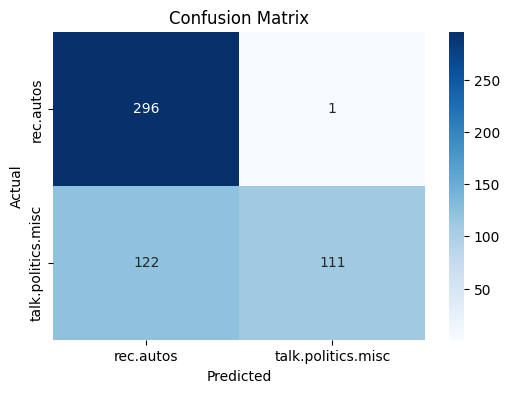

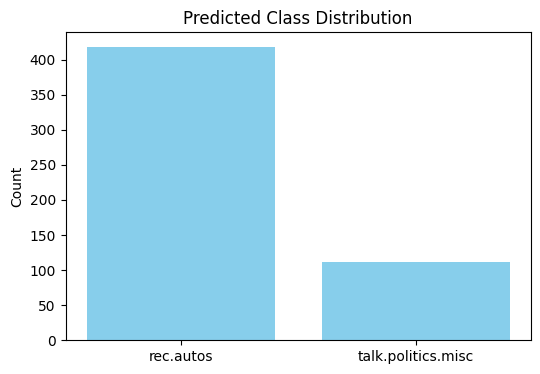

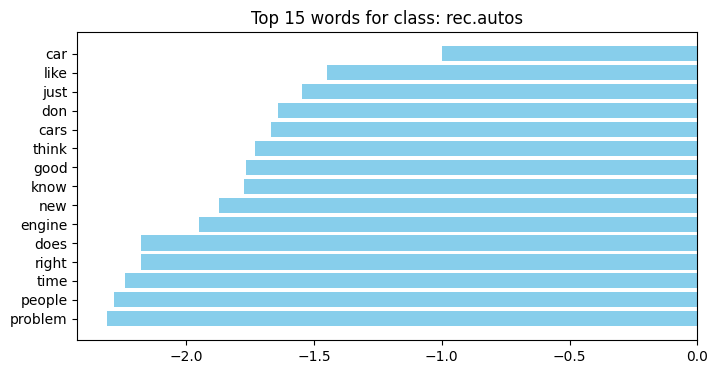

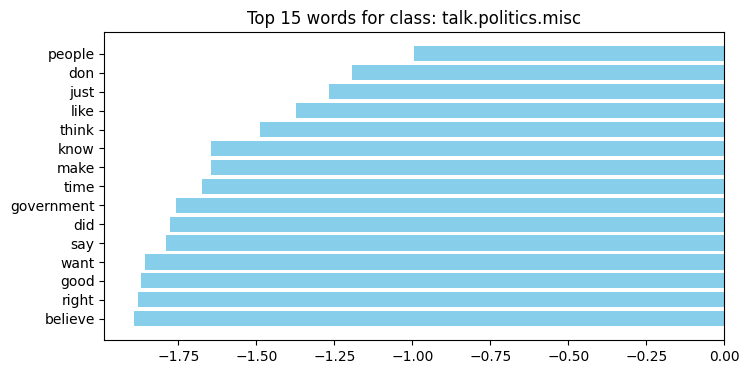

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
categories = ['rec.autos', 'talk.politics.misc']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, stratify=data.target, random_state=42
)

# 3. Convert text to binary features (word present or not)
vectorizer = CountVectorizer(binary=True, stop_words='english')
X_train_bin = vectorizer.fit_transform(X_train)
X_test_bin = vectorizer.transform(X_test)

# 4. Train Bernoulli Naïve Bayes
model = BernoulliNB()
model.fit(X_train_bin, y_train)

# 5. Predictions
y_pred = model.predict(X_test_bin)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=categories))


# ---------------- VISUALIZATIONS ---------------- #

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. Class Distribution of Predictions
unique, counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(6, 4))
plt.bar([categories[i] for i in unique], counts, color="skyblue")
plt.title("Predicted Class Distribution")
plt.ylabel("Count")
plt.show()

# 3. Top Words per Class
def plot_top_words(classifier, vectorizer, categories, n=15):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        # Get top words (by log prob)
        topn = np.argsort(classifier.feature_log_prob_[i])[-n:]
        plt.figure(figsize=(8, 4))
        plt.barh(feature_names[topn], classifier.feature_log_prob_[i][topn], color="skyblue")
        plt.title(f"Top {n} words for class: {category}")
        plt.show()

plot_top_words(model, vectorizer, categories)
